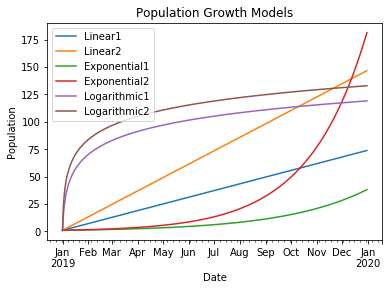

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#Create a dataset for use in our lesson, don't worry about the details on this
dates = pd.date_range(datetime(2019,1,1),datetime(2019,12,31))
base = pd.Series(range(len(dates)), index=dates)
linear1 = 1 + base/5
linear2 = 1 + base/2.5
exp1 = np.exp(base/100)
exp2 = np.exp(base/70)
log1 = 20*np.log(base+1) + 1
log2 = 20*np.log(base*2+1) + 1

data = pd.concat([linear1, linear2, exp1, exp2, log1, log2], axis=1)

data.columns = ["Linear1", "Linear2", "Exponential1", "Exponential2",
               "Logarithmic1", "Logarithmic2"]
data.index.name = 'Date'
data.plot(kind='line')
plt.ylabel("Population")
plt.title("Population Growth Models")
plt.show()

In [2]:
import sqlite3
import os

#First make sure if the database is already there that we erase it prior to this lesson
if os.path.exists("Population.db"):
    os.remove("Population.db")

#Create the database
conn = sqlite3.connect('Population.db')

#To sql on a pndas dataframe takes a table name and connection then pushes this data to sql
data.to_sql("Curves", conn)

In [3]:
#We can query this data and transform into a pandas dataframe like so
#Notice that the index 
query = 'SELECT * FROM Curves;'
df = pd.read_sql(query, conn)
print(df.tail(5))

                    Date  Linear1  Linear2  Exponential1  Exponential2  \
360  2019-12-27 00:00:00     73.0    145.0     36.598234    171.204225   
361  2019-12-28 00:00:00     73.2    145.4     36.966053    173.667553   
362  2019-12-29 00:00:00     73.4    145.8     37.337568    176.166324   
363  2019-12-30 00:00:00     73.6    146.2     37.712817    178.701048   
364  2019-12-31 00:00:00     73.8    146.6     38.091837    181.272242   

     Logarithmic1  Logarithmic2  
360    118.777559    132.612783  
361    118.832884    132.668184  
362    118.888057    132.723433  
363    118.943077    132.778530  
364    118.997947    132.833475  


In [4]:
#You can't do this if the table already exists normally
data.to_sql("Curves", conn)

ValueError: Table 'Curves' already exists.

In [5]:
#But if, for example, we wanted to replace with only the first 6 months of data, we can change the
#if_exists argument to be 'replace'
data.loc[:"2019-06-30"].to_sql("Curves", conn, if_exists='replace')
query = 'SELECT * FROM Curves;'
df = pd.read_sql(query, conn)
print(df.tail(5))

                    Date  Linear1  Linear2  Exponential1  Exponential2  \
176  2019-06-26 00:00:00     36.2     71.4      5.812437     12.357779   
177  2019-06-27 00:00:00     36.4     71.8      5.870853     12.535585   
178  2019-06-28 00:00:00     36.6     72.2      5.929856     12.715950   
179  2019-06-29 00:00:00     36.8     72.6      5.989452     12.898911   
180  2019-06-30 00:00:00     37.0     73.0      6.049647     13.084503   

     Logarithmic1  Logarithmic2  
176    104.522995    118.329361  
177    104.635671    118.442356  
178    104.747716    118.554716  
179    104.859137    118.666448  
180    104.969941    118.777559  


In [6]:
#Changing the argument to append allows for adding on to the latest
data.loc["2019-07-01":].to_sql("Curves", conn, if_exists='append')
query = 'SELECT * FROM Curves;'
df = pd.read_sql(query, conn)
print(df.head(5))
print()
print(df.tail(5))

                  Date  Linear1  Linear2  Exponential1  Exponential2  \
0  2019-01-01 00:00:00      1.0      1.0      1.000000      1.000000   
1  2019-01-02 00:00:00      1.2      1.4      1.010050      1.014388   
2  2019-01-03 00:00:00      1.4      1.8      1.020201      1.028984   
3  2019-01-04 00:00:00      1.6      2.2      1.030455      1.043789   
4  2019-01-05 00:00:00      1.8      2.6      1.040811      1.058807   

   Logarithmic1  Logarithmic2  
0      1.000000      1.000000  
1     14.862944     22.972246  
2     22.972246     33.188758  
3     28.725887     39.918203  
4     33.188758     44.944492  

                    Date  Linear1  Linear2  Exponential1  Exponential2  \
360  2019-12-27 00:00:00     73.0    145.0     36.598234    171.204225   
361  2019-12-28 00:00:00     73.2    145.4     36.966053    173.667553   
362  2019-12-29 00:00:00     73.4    145.8     37.337568    176.166324   
363  2019-12-30 00:00:00     73.6    146.2     37.712817    178.701048   
364 

In [7]:
#We can get table details if we do the following
cur = conn.cursor()
query = 'PRAGMA table_info("Curves")'
print(cur.execute(query).fetchall())

[(0, 'Date', 'TIMESTAMP', 0, None, 0), (1, 'Linear1', 'REAL', 0, None, 0), (2, 'Linear2', 'REAL', 0, None, 0), (3, 'Exponential1', 'REAL', 0, None, 0), (4, 'Exponential2', 'REAL', 0, None, 0), (5, 'Logarithmic1', 'REAL', 0, None, 0), (6, 'Logarithmic2', 'REAL', 0, None, 0)]


In [8]:
#Get the types and column names from this
query = 'PRAGMA table_info("Curves")'
table_info = pd.DataFrame(cur.execute(query).fetchall())[[1,2]]
table_info.columns = ['Name', 'Type']
print(table_info)

           Name       Type
0          Date  TIMESTAMP
1       Linear1       REAL
2       Linear2       REAL
3  Exponential1       REAL
4  Exponential2       REAL
5  Logarithmic1       REAL
6  Logarithmic2       REAL


In [9]:
print(table_info['Name'] +" " +table_info['Type'])

0       Date TIMESTAMP
1         Linear1 REAL
2         Linear2 REAL
3    Exponential1 REAL
4    Exponential2 REAL
5    Logarithmic1 REAL
6    Logarithmic2 REAL
dtype: object


In [10]:
#Combine the variables by joining a comma and new line
variables = ",\n".join((table_info['Name'] +" " +table_info['Type']).values)
print(variables)

Date TIMESTAMP,
Linear1 REAL,
Linear2 REAL,
Exponential1 REAL,
Exponential2 REAL,
Logarithmic1 REAL,
Logarithmic2 REAL


In [11]:
#Put the table query together
table_create_query = """CREATE TABLE Curves(
{}
);""".format(variables)
print(table_create_query)

CREATE TABLE Curves(
Date TIMESTAMP,
Linear1 REAL,
Linear2 REAL,
Exponential1 REAL,
Exponential2 REAL,
Logarithmic1 REAL,
Logarithmic2 REAL
);


In [12]:
#Drop the table and push the data
query = "DROP TABLE Curves;"
cur.execute(query)

cur.execute(table_create_query)

data.to_sql("Curves", conn, if_exists='append')


In [13]:
import time

#Time running a query 100 times
run_times = []
for _ in range(100):
    start_time = time.time()
    query = 'SELECT * FROM Curves WHERE Date > "2019-05-01";'
    df = pd.read_sql(query, conn)
    end_time = time.time()
    run_times.append(end_time-start_time)
print(sum(run_times))

0.20688652992248535


In [14]:
#Update the table creation query to add a primary key
table_create_query = table_create_query.replace("Date TIMESTAMP", "Date TIMESTAMP PRIMARY KEY")
print(table_create_query)

CREATE TABLE Curves(
Date TIMESTAMP PRIMARY KEY,
Linear1 REAL,
Linear2 REAL,
Exponential1 REAL,
Exponential2 REAL,
Logarithmic1 REAL,
Logarithmic2 REAL
);


In [15]:
#Re-create the table
query = "DROP TABLE Curves;"
cur.execute(query)

cur.execute(table_create_query)

data.to_sql("Curves", conn, if_exists='append')

In [16]:
#Test running again
run_times = []
for _ in range(100):
    start_time = time.time()
    query = 'SELECT * FROM Curves WHERE Date > "2019-05-01";'
    df = pd.read_sql(query, conn)
    end_time = time.time()
    run_times.append(end_time-start_time)
print(sum(run_times))

0.20188379287719727


In [17]:
#SELECT with LIMIT can pull the top N rows
query = 'SELECT * FROM Curves LIMIT 10;'
df = pd.read_sql(query, conn)
print(df)

                  Date  Linear1  Linear2  Exponential1  Exponential2  \
0  2019-01-01 00:00:00      1.0      1.0      1.000000      1.000000   
1  2019-01-02 00:00:00      1.2      1.4      1.010050      1.014388   
2  2019-01-03 00:00:00      1.4      1.8      1.020201      1.028984   
3  2019-01-04 00:00:00      1.6      2.2      1.030455      1.043789   
4  2019-01-05 00:00:00      1.8      2.6      1.040811      1.058807   
5  2019-01-06 00:00:00      2.0      3.0      1.051271      1.074041   
6  2019-01-07 00:00:00      2.2      3.4      1.061837      1.089495   
7  2019-01-08 00:00:00      2.4      3.8      1.072508      1.105171   
8  2019-01-09 00:00:00      2.6      4.2      1.083287      1.121072   
9  2019-01-10 00:00:00      2.8      4.6      1.094174      1.137203   

   Logarithmic1  Logarithmic2  
0      1.000000      1.000000  
1     14.862944     22.972246  
2     22.972246     33.188758  
3     28.725887     39.918203  
4     33.188758     44.944492  
5     36.835189

In [18]:
#When given a column, MIN() returns the minimum
query = 'SELECT MIN(Linear1), MIN(Linear2) FROM Curves;'
df = pd.read_sql(query, conn)
print(df)
print()
print()

#And MAX() returns the maximum
query = 'SELECT MAX(Linear1), MAX(Linear2) FROM Curves;'
df = pd.read_sql(query, conn)
print(df)

   MIN(Linear1)  MIN(Linear2)
0           1.0           1.0


   MAX(Linear1)  MAX(Linear2)
0          73.8         146.6


In [19]:
#Count can be used to find the number of entries, with or without a given condition.

query = 'SELECT COUNT(Linear1) FROM Curves;'
df = pd.read_sql(query, conn)
print(df)
print()
print()

query = 'SELECT COUNT(Linear1) FROM Curves WHERE Linear1 > 50;'
df = pd.read_sql(query, conn)
print(df)

   COUNT(Linear1)
0             365


   COUNT(Linear1)
0             119


In [20]:
#AVG gives an average, with or without a given condition.
query = 'SELECT AVG(Linear1) FROM Curves;'
df = pd.read_sql(query, conn)
print(df)
print()
print()

query = 'SELECT AVG(Linear1) FROM Curves WHERE Linear1 > 50;'
df = pd.read_sql(query, conn)
print(df)

   AVG(Linear1)
0          37.4


   AVG(Linear1)
0          62.0


In [21]:
#There is also SUM, with or without a given condition.
#It does not actually make sense in this context though
query = 'SELECT SUM(Linear1) FROM Curves;'
df = pd.read_sql(query, conn)
print(df)
print()
print()

query = 'SELECT SUM(Linear1) FROM Curves WHERE Linear1 > 50;'
df = pd.read_sql(query, conn)
print(df)

   SUM(Linear1)
0       13651.0


   SUM(Linear1)
0        7378.0


In [22]:
#Find the maximum date
query = 'SELECT MAX(Date) FROM Curves'
print(cur.execute(query).fetchall())

[('2019-12-31 00:00:00',)]


In [23]:
#Convert to datetime
query = 'SELECT MAX(Date) FROM Curves'
latest_date = pd.to_datetime(cur.execute(query).fetchall()[0][0])
print(latest_date)

2019-12-31 00:00:00


In [24]:
#Remember that you can use pd.Timedelta to add to dates
print(latest_date+pd.Timedelta("1D"))

2020-01-01 00:00:00


In [25]:
#First create the functiona as though it would just return the next day, and the day N days after
def update_model(date, n_days):
    start_date = date + pd.Timedelta("1D")
    end_date = date + pd.Timedelta("{}D".format(n_days))
    print(start_date, end_date)
update_model(latest_date, 5)

2020-01-01 00:00:00 2020-01-05 00:00:00


In [26]:
#Change the function to return the date range
def update_model(date, n_days):
    start_date = date + pd.Timedelta("1D")
    end_date = date + pd.Timedelta("{}D".format(n_days))
    dates = pd.date_range(start_date,end_date)
    base = pd.Series(range(len(dates)), index=dates)
    print(base)
update_model(latest_date, 5)

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
Freq: D, dtype: int64


In [27]:
#Recall what subtracting two dates looks like
start_date = datetime(2019,1,1)
current_date = datetime(2020,1,1)
delta = current_date - start_date
print(delta)

365 days, 0:00:00


In [28]:
#You can access the days by using the days attribute
print(delta.days)

365


In [29]:
#You can expand this to finding the difference between a date range a given days
date_range = pd.date_range(datetime(2020,1,1),datetime(2020,1,5))
#This gives the difference in time
print(date_range - datetime(2019,1,1))
print()
print()
#And this takes the integer number of days difference in time
print((date_range - datetime(2019,1,1)).days)

TimedeltaIndex(['365 days', '366 days', '367 days', '368 days', '369 days'], dtype='timedelta64[ns]', freq=None)


Int64Index([365, 366, 367, 368, 369], dtype='int64')


In [30]:
#Update the model to have values equal to the number of days since the start date
def update_model(date, n_days):
    start_date = date + pd.Timedelta("1D")
    end_date = date + pd.Timedelta("{}D".format(n_days))
    dates = pd.date_range(start_date,end_date)
    base_values = (pd.date_range(start_date,end_date) - datetime(2019,1,1)).days
    base = pd.Series(base_values, index=dates)
    print(base)
update_model(latest_date, 5)

2020-01-01    365
2020-01-02    366
2020-01-03    367
2020-01-04    368
2020-01-05    369
Freq: D, dtype: int64


In [31]:
#Add in the population models
def update_model(date, n_days):
    start_date = date + pd.Timedelta("1D")
    end_date = date + pd.Timedelta("{}D".format(n_days))
    dates = pd.date_range(start_date,end_date)
    base_values = (pd.date_range(start_date,end_date) - datetime(2019,1,1)).days
    base = pd.Series(base_values, index=dates)
    linear1 = 1 + base/5
    linear2 = 1 + base/2.5
    exp1 = np.exp(base/100)
    exp2 = np.exp(base/70)
    log1 = 20*np.log(base+1) + 1
    log2 = 20*np.log(base*2+1) + 1

    data = pd.concat([linear1, linear2, exp1, exp2, log1, log2], axis=1)

    data.columns = ["Linear1", "Linear2", "Exponential1", "Exponential2",
                   "Logarithmic1", "Logarithmic2"]
    data.index.name = 'Date'
    return data
new_data = update_model(latest_date, 5)
print(new_data)

            Linear1  Linear2  Exponential1  Exponential2  Logarithmic1  \
Date                                                                     
2020-01-01     74.0    147.0     38.474666    183.880431    119.052667   
2020-01-02     74.2    147.4     38.861343    186.526147    119.107237   
2020-01-03     74.4    147.8     39.251906    189.209931    119.161659   
2020-01-04     74.6    148.2     39.646394    191.932329    119.215933   
2020-01-05     74.8    148.6     40.044847    194.693898    119.270060   

            Logarithmic2  
Date                      
2020-01-01    132.888269  
2020-01-02    132.942914  
2020-01-03    132.997410  
2020-01-04    133.051758  
2020-01-05    133.105958  


In [32]:
#Append the data
new_data.to_sql("Curves", conn, if_exists='append')

In [33]:
query = 'SELECT * FROM Curves;'
df = pd.read_sql(query, conn)
df.tail(10)

,Date,Linear1,Linear2,Exponential1,Exponential2,Logarithmic1,Logarithmic2
360,2019-12-27 00:00:00,73.0,145.0,36.598234,171.204225,118.777559,132.612783
361,2019-12-28 00:00:00,73.2,145.4,36.966053,173.667553,118.832884,132.668184
362,2019-12-29 00:00:00,73.4,145.8,37.337568,176.166324,118.888057,132.723433
363,2019-12-30 00:00:00,73.6,146.2,37.712817,178.701048,118.943077,132.778530
364,2019-12-31 00:00:00,73.8,146.6,38.091837,181.272242,118.997947,132.833475
365,2020-01-01 00:00:00,74.0,147.0,38.474666,183.880431,119.052667,132.888269
366,2020-01-02 00:00:00,74.2,147.4,38.861343,186.526147,119.107237,132.942914
367,2020-01-03 00:00:00,74.4,147.8,39.251906,189.209931,119.161659,132.997410
368,2020-01-04 00:00:00,74.6,148.2,39.646394,191.932329,119.215933,133.051758
369,2020-01-05 00:00:00,74.8,148.6,40.044847,194.693898,119.270060,133.105958
